In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [16]:
%pip install seaborn

In [18]:
import seaborn as sns

In [19]:
df = pd.read_csv('renttherunway.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
## lets check first few samples
df.head(2)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"


In [21]:
## lets check the shape of the dataset
df.shape

(192544, 15)

In [22]:
## lets check the basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192482 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192199 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 14.7+ MB


In [23]:
## checking the presence of duplicate records
len(df[df.duplicated()])

189

In [24]:
## dropping the duplicated record from the dataset
df.drop_duplicates(inplace=True)

In [25]:
## recheck the presence of the duplicate record
len(df[df.duplicated()])

0

In [26]:
## dropping the redundant columns from the dataset.
df.drop(['user_id', 'item_id', 'review_text', 'review_summary', 'review_date'],axis=1,inplace=True)

In [27]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0


In [28]:
df['weight'] = df['weight'].str.replace('lbs','').astype(float)

In [29]:
df['weight'].head()

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

In [30]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [35]:
## grouping 'party: cocktail' category with the 'party'.
df['rented for'] = df['rented for'].str.replace('party: cocktail','party')

In [32]:
## recheck unique values after grouping
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [33]:
## Removing quotation marks
df['height'] = df['height'].str.replace("'",'')
df['height'] = df['height'].str.replace('"','')

In [34]:
## Convert the feet to inches and convert the datatype to float
df['height'] = (df['height'].str[:1].astype(float)*12 + df['height'].str[1:].astype(float))

In [36]:
df['height'].head()

0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64

In [37]:
df.isnull().sum()/len(df)*100

fit            0.000000
bust size      9.561488
weight        15.572769
rating         0.042110
rented for     0.005199
body type      7.603130
category       0.000000
height         0.350914
size           0.000000
age            0.499077
dtype: float64

In [38]:
## Lets treat numerical columns with median imputation technique.
for col in ['weight','rating','height','age']:
    df[col].fillna(df[col].median(), inplace=True)

In [39]:
## Lets treat categoricak columns with mode imputation technique.
for col in ['bust size','rented for','body type','category']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [40]:
## lets recheck the missing values
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [41]:
## let us check the statistical summary for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192355.0,137.019875,20.143567,50.0,125.0,135.0,145.0,300.0
rating,192355.0,9.092709,1.429922,2.0,8.0,10.0,10.0,10.0
height,192355.0,65.309334,2.658946,54.0,63.0,65.0,67.0,78.0
size,192355.0,12.245801,8.496299,0.0,8.0,12.0,16.0,58.0
age,192355.0,33.860633,8.039386,0.0,29.0,32.0,37.0,117.0


In [42]:
## let us check the statistical summary for the categorical columns.
df.describe(include='O').T

,count,unique,top,freq
fit,192355,3,fit,141909
bust size,192355,106,34b,45647
rented for,192355,8,wedding,57747
body type,192355,7,hourglass,69915
category,192355,68,dress,92752


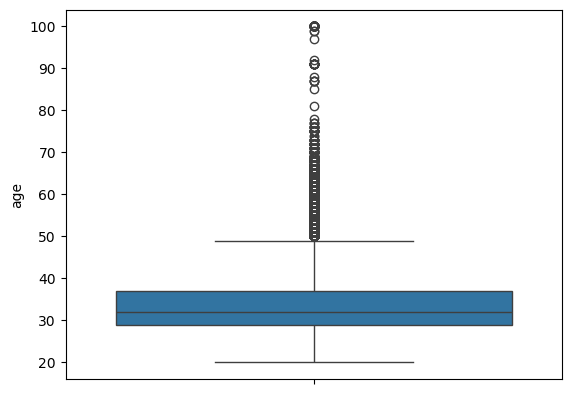

In [44]:
sns.boxplot(df['age'])
plt.show()

In [43]:
## lets treat the outliers in the column age using capping techinque

df['age'] = pd.DataFrame(np.where(df['age']>=100,100,df['age']))
df['age'] = pd.DataFrame(np.where(df['age']<=20,20,df['age']))

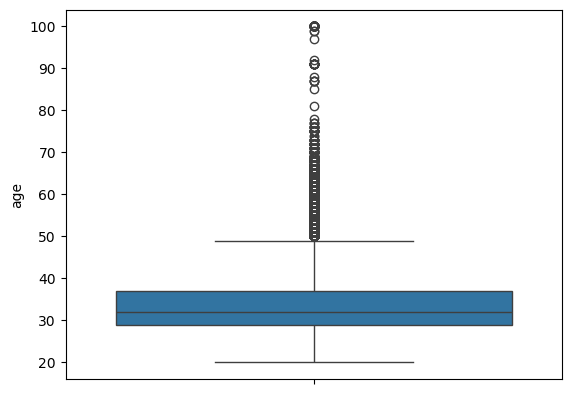

In [45]:
sns.boxplot(df['age'])
plt.show()

In [46]:
## after applying capping technique for the column age, there might be some presence of missing values in columns age, So drop them
df.dropna(inplace=True)

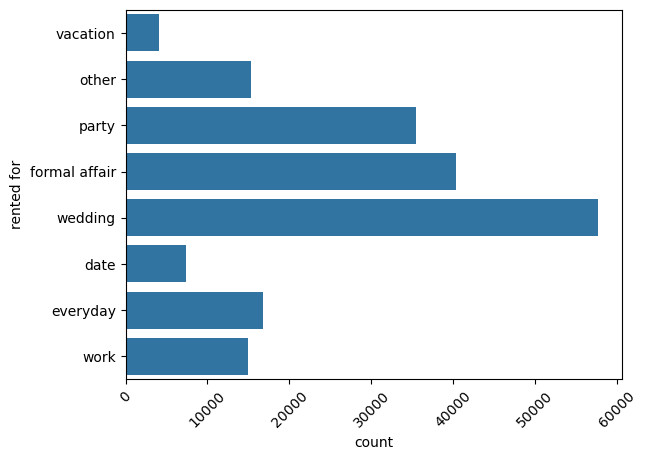

In [47]:
## let us check the distribution of the column rented for
sns.countplot(df['rented for'])
plt.xticks(rotation=45)
plt.show()

In [48]:
## Let us make a copy of the cleaned dataset before encoding and standardizing the columns
dfc1 = df.copy()

In [49]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [50]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,135.0,10.0,4,3,45,64.0,4,100.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0


In [51]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.

mm = MinMaxScaler()

df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0.0,0.371429,0.348,1.00,0.714286,0.500000,0.656716,0.583333,0.241379,0.1000
1,0.0,0.352381,0.328,1.00,0.428571,1.000000,0.298507,0.500000,0.206897,0.2000
2,0.0,0.352381,0.340,1.00,0.571429,0.500000,0.671642,0.416667,0.068966,1.0000
3,0.0,0.361905,0.340,0.75,0.285714,0.666667,0.238806,0.458333,0.137931,0.1750
4,0.0,0.352381,0.380,1.00,0.857143,0.166667,0.298507,0.625000,0.206897,0.0875


In [52]:
## Let us make a copy of the cleaned dataset after encoding and standardizing the columns.
dfc2 = df.copy()

In [53]:
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(df.T)
cov_matrix

array([[ 1.26730745e-01,  3.45701617e-04,  3.89168782e-04,
        -1.55972778e-02,  8.78647447e-04, -7.07071132e-04,
         1.44511855e-05,  1.02680451e-05,  3.40946354e-03,
         6.17262942e-06],
       [ 3.45701617e-04,  1.08867149e-02,  4.78083550e-03,
        -3.93676333e-04, -5.98882983e-05, -5.91196654e-03,
        -2.18508806e-04,  1.70272658e-03,  9.58697159e-03,
         1.79219656e-05],
       [ 3.89168782e-04,  4.78083550e-03,  6.49054977e-03,
        -3.00611278e-04,  2.31081613e-04, -4.95890557e-03,
        -2.22493614e-04,  3.11676011e-03,  8.53408158e-03,
        -5.94072717e-06],
       [-1.55972778e-02, -3.93676333e-04, -3.00611278e-04,
         3.19574727e-02,  6.63820980e-04,  2.22987872e-04,
        -8.05529964e-04,  3.50561318e-05, -9.61954298e-04,
         4.54908867e-06],
       [ 8.78647447e-04, -5.98882983e-05,  2.31081613e-04,
         6.63820980e-04,  8.65633768e-02, -7.05120242e-04,
        -3.23050298e-03, -5.60041470e-04,  2.13246115e-04,
        -1.

In [54]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [0.12938976 0.08680527 0.07224491 0.03631375 0.02964848 0.02838126
 0.00235741 0.00516446 0.01126672 0.00987405]


eigein vectors 
 [[-9.86372904e-01 -1.67817535e-02 -2.68987573e-02  1.74759323e-02
  -1.51875288e-01 -4.98824101e-02  6.45514540e-03 -1.18206470e-02
   4.70738339e-03  3.27795763e-05]
 [-7.48815116e-03  4.14554752e-03  1.35147780e-01  1.88244564e-02
   2.04955240e-01 -3.73968854e-01 -1.22881254e-01 -8.62686190e-01
  -1.99878578e-01 -1.30151965e-02]
 [-7.08464750e-03  6.67437203e-03  1.12228985e-01  1.62226924e-02
   1.65721693e-01 -3.06774966e-01  9.27436082e-01  4.49882568e-02
   5.75037289e-02 -1.96745018e-03]
 [ 1.58226924e-01  1.73682515e-02 -2.67121451e-03  1.02822736e-01
  -8.64703867e-01 -4.65035702e-01  9.92905539e-04 -1.01662148e-03
  -1.04527413e-02 -8.20422044e-04]
 [-1.82056607e-02  9.96583741e-01 -4.54436596e-02 -6.53225158e-02
   9.03480164e-03 -1.28979703e-04 -2.65763611e-03 -2.80231857e-03
   7.59419093e-03  1.73527053e-03]
 [ 1.85389811e-02 

In [55]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [31.447561827657584, 21.09760645520502, 17.558780484634955, 8.825884429666102, 7.205921116154427, 6.897930620612189, 2.73832168800757, 2.399840275145245, 1.2551968667545952, 0.5729562361623065]
Cummulative Variance Explained:  [ 31.44756183  52.54516828  70.10394877  78.9298332   86.13575431
  93.03368493  95.77200662  98.1718469   99.42704376 100.        ]


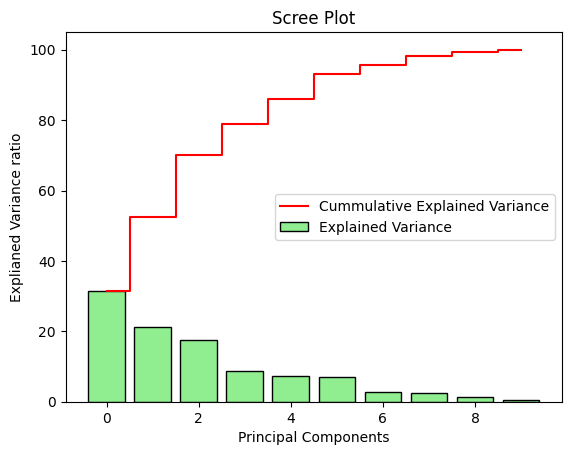

In [43]:
## Scree plot.
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

In [56]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 6)
pca = PCA(n_components=6)

pca_df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.209133,-0.136583,0.009660,0.296642,-0.067215,0.110611
1,-0.225558,0.147587,-0.476618,-0.079279,-0.001126,0.151264
2,-0.218292,0.009051,-0.036041,0.309346,-0.150861,-0.042320
3,-0.184834,0.276023,-0.165377,-0.117140,0.147685,-0.098476
4,-0.201696,-0.316338,0.318520,-0.045902,-0.092240,-0.013113


In [59]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [60]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

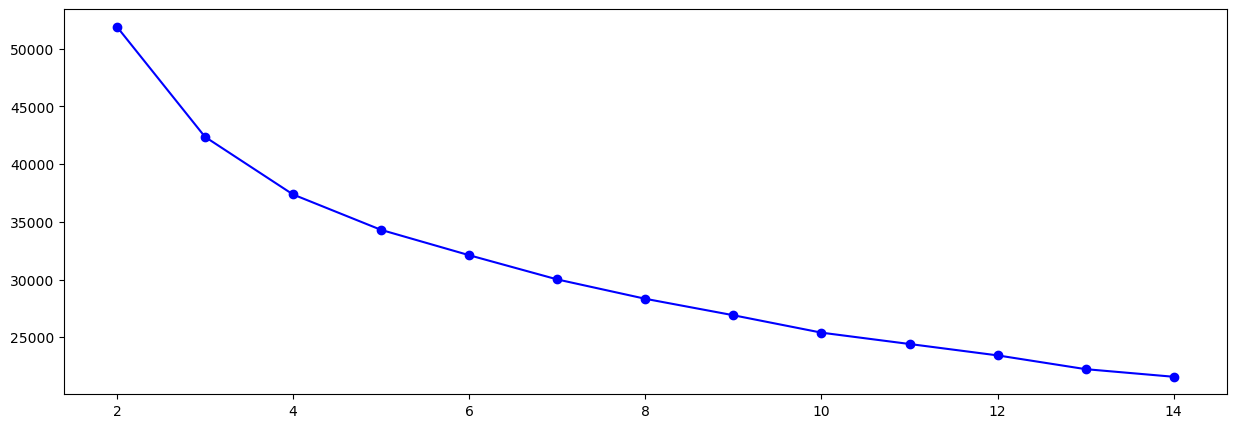

In [68]:
## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [61]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [62]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [64]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,-0.209133,-0.136583,0.009660,0.296642,-0.067215,0.110611,1
1,-0.225558,0.147587,-0.476618,-0.079279,-0.001126,0.151264,2
2,-0.218292,0.009051,-0.036041,0.309346,-0.150861,-0.042320,1
3,-0.184834,0.276023,-0.165377,-0.117140,0.147685,-0.098476,2
4,-0.201696,-0.316338,0.318520,-0.045902,-0.092240,-0.013113,1


In [65]:
kmeans_df['Label'].value_counts()

1    82498
2    65782
0    43697
Name: Label, dtype: int64

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
## finding optimal clusters through silhoutte score
from sklearn.metrics import silhouette_score
for i in range(2,15):
    kmeans = KMeans(i,random_state=100)
    kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i,silhouette_score(pca_df,labels))

<class 'numpy.core._exceptions._ArrayMemoryError'>: Unable to allocate 1.00 GiB for an array with shape (699, 191977) and data type float64

In [70]:
## Taking a sample of 50K rows from the dfc2 dataframe using random sampling technique provided by pandas 

## Storing it in the new dataframe called 'dfc3' 
dfc3 = dfc2.sample(n=50000)

## reseting the index
dfc3.reset_index(inplace=True,drop=True)

In [71]:
dfc3.head(4)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0.0,0.228571,0.28,1.00,0.571429,0.166667,0.238806,0.416667,0.068966,0.5000
1,0.0,0.352381,0.36,1.00,0.285714,0.666667,0.298507,0.458333,0.137931,0.1625
2,0.0,0.371429,0.36,1.00,0.857143,0.500000,0.298507,0.500000,0.206897,0.2250
3,0.0,0.504762,0.34,0.75,0.857143,0.333333,0.238806,0.541667,0.482759,0.0625


In [72]:
plt.figure(figsize=[18,5])
merg = linkage(dfc3, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

<Figure size 1800x500 with 0 Axes>

<class 'ValueError'>: negative dimensions are not allowed

In [73]:
## Building hierarchical clustering model using the optimal clusters as 2
hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(dfc3)

<class 'ValueError'>: negative dimensions are not allowed

In [74]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

<class 'NameError'>: name 'hie_cluster_model' is not defined

In [75]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc1)

df_hier = dfc1.join(df_label1)
df_hier.head()

<class 'NameError'>: name 'df_label1' is not defined

In [76]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(dfc3)
    labels = hier.fit_predict(dfc3)
    print(i,silhouette_score(dfc3,labels))

<class 'ValueError'>: negative dimensions are not allowed

In [77]:
df_hier.head(2)

<class 'NameError'>: name 'df_hier' is not defined

In [78]:
df_hier['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

<class 'NameError'>: name 'df_hier' is not defined

In [79]:
## Let us check the distribution of the different categories of 'rented for' column 
## w.r.t the clusters formed by agglomerative clustering technique.
sns.countplot(df_hier['rented for'],hue='Labels',data=df_hier)
plt.xticks(rotation = 45)
plt.show()

<class 'NameError'>: name 'df_hier' is not defined

In [80]:
## Lets check the age distribution of the different clusters.
sns.kdeplot(df_hier['age'],hue='Labels',data=df_hier)
plt.show()

<class 'NameError'>: name 'df_hier' is not defined